In [2]:
import os
from scripts import check_claim_structure as cs
from scripts import table
from scripts import utils
from scripts import eval

In [6]:
def process_datasets(tables_path, requests_path):
    dataset_results = {}

    # Iterate through all directories in dataset_path
    for directory in os.listdir(requests_path):
        if os.path.isdir(os.path.join(requests_path, directory)):
            model_answers_path = os.path.join(requests_path, directory, 'answers')
            extracted_claims_path = os.path.join(requests_path, directory, 'claims.json')

            extracted_claims = cs.extract_answers(model_answers_path, extracted_claims_path)
            extracted_tables = table.load_tables_from_json(tables_path)

            results = eval.evaluate_extracted_articles(extracted_claims, extracted_tables)
            results = list(results.items())
            results.sort()

            dataset_results[directory] = results

    return dataset_results

tables_file_path = 'experiments/extracted_tables/cs_tables.json'
dataset_path = 'experiments/output/cs_main'

d_results = process_datasets(tables_file_path, dataset_path)

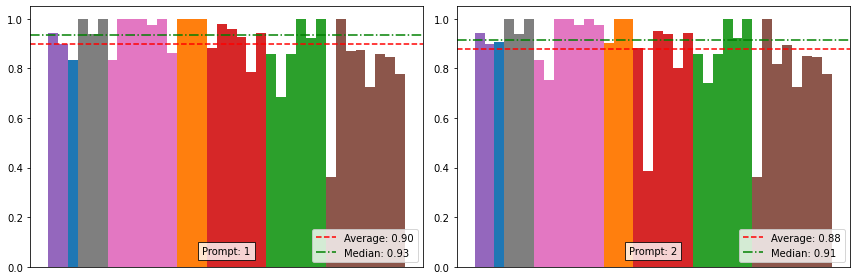

In [7]:
utils.plot_dataset_results(d_results, 2)

In [3]:
answers_path = 'experiments/output/cs_main/1/answers'
output_path = 'experiments/output/cs_main/1/claims.json'
tables_file_path = 'experiments/extracted_tables/cs_tables.json'

claims = cs.extract_answers(answers_path, output_path)
tables = table.load_tables_from_json(tables_file_path)

In [6]:
article_id = '2307.01231'
table_idx = 5

html_table = tables[article_id][table_idx]['table']
table_values, table_pd = cs.get_table_values(html_table)

claim_values = claims[article_id][table_idx]['extracted_claims']
claim_specs, claim_results, all_values_extracted = cs.count_specifications(claim_values)

unique_table_vales = utils.remove_duplicates(table_values)
unique_values_extracted = utils.remove_duplicates(all_values_extracted)

similarities, similarity_scores = eval.find_similar_strings(unique_table_vales, unique_values_extracted)

# table_pd[0].head()
# utils.print_claims(claims)

eval.evaluate(similarities, table_values, all_values_extracted)

0.8571428571428571

In [7]:
table_pd[0].head()

Unnamed: 0_level_0 D1subscript𝐷1D_{1} D2subscript𝐷2D_{2}  \
       Unnamed: 0_level_1 D1subscript𝐷1D_{1} D2subscript𝐷2D_{2}   
0  Dn​1subscript𝐷𝑛1D_{n1}                Abt                Buy   
1  Dn​2subscript𝐷𝑛2D_{n2}             Amazon                 GP   
2  Dn​3subscript𝐷𝑛3D_{n3}               DBLP                ACM   
3  Dn​4subscript𝐷𝑛4D_{n4}               IMDB               TMDB   
4  Dn​5subscript𝐷𝑛5D_{n5}               IMDB               TVDB   

  |D1|subscript𝐷1|D_{1}| |D2|subscript𝐷2|D_{2}| |A|𝐴|A| Blocking performance  \
  |D1|subscript𝐷1|D_{1}| |D2|subscript𝐷2|D_{2}| |A|𝐴|A|              P​C𝑃𝐶PC   
0                   1076                   1076       3                0.899   
1                   1354                   3039       4                0.910   
2                   2616                   2294       4                0.983   
3                   5118                   6056       5                0.898   
4                   5118                   7810       4                0.891   

                           ... DeepBlocker config.                          \
  P​Q𝑃𝑄PQ |C|𝐶|C| |P|𝑃|P|  ...           c​l.𝑐𝑙cl. K𝐾K       i​n​d.𝑖𝑛𝑑ind.   
0   0.029   33356     967  ...             ×\times  31  D2subscript𝐷2D_{2}   
1   0.074   13540    1005  ...             ×\times  10  D1subscript𝐷1D_{1}   
2   0.953    2294    2186  ...                   ✓   1  D2subscript𝐷2D_{2}   
3   0.011  158658    1768  ...                   ✓  31  D1subscript𝐷1D_{1}   
4   0.003  322434     955  ...             ×\times  63  D1subscript𝐷1D_{1}   

  |It​r|subscript𝐼𝑡𝑟|I_{tr}| |It​e|subscript𝐼𝑡𝑒|I_{te}|  \
  |It​r|subscript𝐼𝑡𝑟|I_{tr}| |It​e|subscript𝐼𝑡𝑒|I_{te}|   
0                      20014                       6671   
1                       8124                       2708   
2                       1376                        459   
3                      95195                      31732   
4                     193460                      64487   

  |Pt​r|subscript𝑃𝑡𝑟|P_{tr}| |Pt​e|subscript𝑃𝑡𝑒|P_{te}|  \
  |Pt​r|subscript𝑃𝑡𝑟|P_{tr}| |Pt​e|subscript𝑃𝑡𝑒|P_{te}|   
0                        580                        193   
1                        603                        201   
2                       1312                        437   
3                       1061                        354   
4                        573                        191   

  |Nt​r|subscript𝑁𝑡𝑟|N_{tr}| |Nt​e|subscript𝑁𝑡𝑒|N_{te}|     IR  
  |Nt​r|subscript𝑁𝑡𝑟|N_{tr}| |Nt​e|subscript𝑁𝑡𝑒|N_{te}|     IR  
0                      19433                       6478   2.9%  
1                       7521                       2507   7.4%  
2                         65                         22  95.3%  
3                      94134                      31378   1.1%  
4                     192887                      64296   0.3%  

[5 rows x 21 columns]

In [6]:
similarities

{'89.11': ['89.11'],
 '98.55': ['98.55'],
 '63.33*': ['63.33*'],
 '59.26': ['59.26'],
 '94.80**+': ['94.80**+'],
 '95.67': ['95.67'],
 '98.09*': ['98.09*'],
 '62.96': ['62.96'],
 'KAER ( Roberta + CST + PCT)': ['KAER ( Roberta + CST + PCT)'],
 '61.76': ['61.76'],
 'Textual': ['Textual'],
 '95.14': ['95.14'],
 '97.04**+': ['97.04**+'],
 '76.25': ['76.25'],
 '96.26**++': ['96.26**++'],
 '67.69': ['67.69'],
 '89.66': ['89.66'],
 '57.14': ['57.14'],
 '98.99': ['98.99'],
 '47.06*': ['47.06*'],
 'RoBERTa': ['RoBERTa'],
 'iTunes-Amazon': ['iTunes-Amazon'],
 '67.20**++': ['67.20**++'],
 '95.72': ['95.72'],
 'DBLP-ACM': ['DBLP-ACM'],
 '88.19': ['88.19'],
 '95.29': ['95.29'],
 '61.29': ['61.29'],
 'Ditto': ['Ditto'],
 '74.85': ['74.85'],
 '95.20': ['95.20'],
 '61.54': ['61.54'],
 'Amazon-Google': ['Amazon-Google'],
 '68.70': ['68.70'],
 '95.47': ['95.47'],
 '89.66**++': ['89.66**++'],
 '94.93+': ['94.93+'],
 '95.63': ['95.63'],
 '60.38': ['60.38'],
 'Abt-Buy': ['Abt-Buy'],
 '88.41': ['88.41'],
 